In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Here we read the Excel data.

In [3]:
import pandas as pd

In [4]:
data = pd.read_excel('data/2015-04-16_Analyse_Spectres_Al300_TiN10nm_Julien.xlsx')

In [5]:
data.head()

,Ecanon [eV],Kinetic Energy [eV],Intensity[cts/s],Ecanon [eV].1,Kinetic Energy [eV].1,Intensity[cts/s].1,Ecanon [eV].2,Kinetic Energy [eV].2,Intensity[cts/s].2,Ecanon [eV].3,...,Intensity[cts/s].12,Ecanon [eV].13,Kinetic Energy [eV].13,Intensity[cts/s].13,Ecanon [eV].14,Kinetic Energy [eV].14,Intensity[cts/s].14,Ecanon [eV].15,Kinetic Energy [eV].15,Intensity[cts/s].15
0,10,-3.0,9980,15,-3.0,8800,20,-3.0,17510,25,...,176715,135,-3.0,214045,165,-3.0,255915,198,-3.0,302750
1,NaN,-2.9,10235,NaN,-2.9,9410,NaN,-2.9,19380,NaN,...,187480,NaN,-2.9,225945,NaN,-2.9,270925,NaN,-2.9,322010
2,NaN,-2.8,11285,NaN,-2.8,10190,NaN,-2.8,19870,NaN,...,201960,NaN,-2.8,247095,NaN,-2.8,272115,NaN,-2.8,345960
3,NaN,-2.7,11985,NaN,-2.7,10845,NaN,-2.7,19450,NaN,...,200350,NaN,-2.7,242555,NaN,-2.7,307890,NaN,-2.7,365220
4,NaN,-2.6,12395,NaN,-2.6,10805,NaN,-2.6,22075,NaN,...,224485,NaN,-2.6,270270,NaN,-2.6,319020,NaN,-2.6,382915


In [6]:
d=dict([(int(data[[0]].values[0]), data[[1,2]].dropna().values), \
        (int(data[[3]].values[0]), data[[4,5]].dropna().values), \
        (int(data[[6]].values[0]), data[[7,8]].dropna().values), \
       (int(data[[9]].values[0]), data[[10,11]].dropna().values), \
       (int(data[[12]].values[0]), data[[13,14]].dropna().values), \
       (int(data[[15]].values[0]), data[[16,17]].dropna().values), \
       (int(data[[18]].values[0]), data[[19,20]].dropna().values), \
       (int(data[[21]].values[0]), data[[22,23]].dropna().values), \
       (int(data[[24]].values[0]), data[[25,26]].dropna().values), \
       (int(data[[27]].values[0]), data[[28,29]].dropna().values), \
       (int(data[[30]].values[0]), data[[31,32]].dropna().values), \
       (int(data[[33]].values[0]), data[[34,35]].dropna().values)])




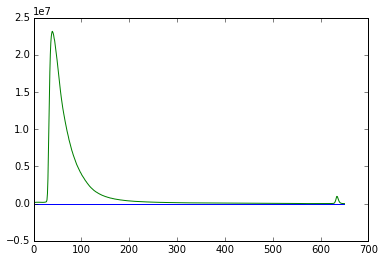

In [14]:
Ecanon = d.keys()

plot(d[Ecanon[0]])




In [176]:
def D(x, s):
    return s*x/(s - 1 + x**s)

def delta_ts(E_0, E_max, delta_max, s):
    return delta_max * D(E_0/E_max, s)

def delta_e(E_0, E_e, P_1e_inf, P_1e_max, W, p):
    return P_1e_inf \
        + (P_1e_max - P_1e_inf)*exp(-(abs(E_0 - E_e)/W)**p / p)
    
def delta_t(E_0, E_max, delta_max, E_e, P_1e_max, s, W, p, P_1e_inf=0):
    return delta_ts(E_0, E_max, delta_max, s) + delta_e(E_0, E_e, P_1e_inf, P_1e_max, W, p)


In [111]:
from scipy.optimize import curve_fit

In [247]:
idx_Ecanon = 4

E  = d[Ecanon[idx_Ecanon]][:,0]

dE = d[Ecanon[idx_Ecanon]][:,1]
dE = dE[E>0]
E = E[E>0]

# backscattered
W = 0.5
p = 2
P_1e_inf = 0
P_1e_max = np.max(dE[len(dE)/2:])
E_e = E[argmin(abs(dE - P_1e_max))]

# true-secondary
s = 2.6
delta_max = np.max(dE[0:round(len(dE)/2)])
E_max = E[argmin(abs(dE - delta_max))]

In [248]:
param0 = np.array([E_max, delta_max, E_e, P_1e_max, s, W, p, P_1e_inf])
param, cov = curve_fit(delta_t, E, dE, p0=param0)

print(param0)
print(param)

[  8.00000000e-01   1.33548000e+07   4.04000000e+01   7.77315000e+05
   2.60000000e+00   5.00000000e-01   2.00000000e+00   0.00000000e+00]
[  8.76746851e-01   1.62518604e+07   3.27703685e+03  -8.16957939e+05
   1.92634862e+00   3.21531210e+03   4.24216752e+02  -2.75351001e+06]


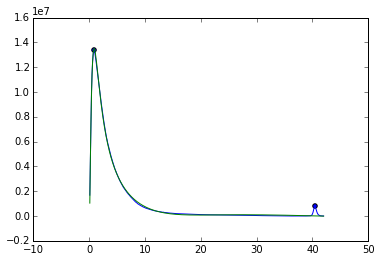

In [249]:
plot(E, dE)
plot(E, delta_t(E, *param))
scatter(E_max, delta_max)
scatter(E_e, P_1e_max)

In [250]:
from scipy.integrate import quad, trapz

In [251]:
trapz(dE, E)

50602663.000000007

In [252]:
trapz(delta_t(E, *param), E)

50635056.420037538

In [253]:
# contributions respectives
I0 = trapz(delta_t(E, *param), E)
print(trapz(delta_ts(E, E_max, delta_max, s), E)/I0)
print(trapz(delta_e(E, E_e, P_1e_inf, P_1e_max, W, p), E)/I0)

0.808830402376
0.0192263200372
